In [1]:
## Provide a wider display for easier viewing
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [82]:
# change plot size
library(repr)
options(repr.plot.width=10, repr.plot.height=6)

# START FROM HERE - LOAD THE FILE

In [10]:
##  Pull in the packages required to perform our analyis
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(sqldf))
suppressPackageStartupMessages(library(forcats))
suppressPackageStartupMessages(library(naniar))
suppressPackageStartupMessages(library(arules))
suppressPackageStartupMessages(library(lubridate))
suppressPackageStartupMessages(library(data.table))

In [3]:
## Read it back in so we don't have to do all the pre-processing again

centralperk_df <- suppressMessages(readr::read_csv(file = "CentralParkAllYears.csv"))

attach(centralperk_df)

In [3]:
head(centralperk_df, 6)

#centralperk_df$Date = as.Date(centralperk_df$Date, format="%b/%d/%y")

id,Date,Time,Hour,DayofWeek,Month,Year,Customer.ID,Category,Item,Qty,Price.Point.Name,Gross.Sales,Discounts,Net.Sales,Tax,Notes,Event.Type
1,7/15/2016,20:40:18,20,Friday,July,2016,NA,Food,Lenka Bar,1,Regular Price,3.50,0,3.50,0,NA,Payment
2,7/15/2016,19:24:07,19,Friday,July,2016,30a7cf59fd4142409f589eae75d78970f9eeb810,Coffee,Cappucino,1,Regular,3.75,0,3.75,0,NA,Payment
3,7/15/2016,19:24:07,19,Friday,July,2016,30a7cf59fd4142409f589eae75d78970f9eeb810,Food,Financier,1,Regular Price,2.50,0,2.50,0,NA,Payment
4,7/15/2016,18:47:09,18,Friday,July,2016,b1b38d9042c64f0b3be34bd68d92656f7ca59b27,Coffee,Americano,1,Regular,3.00,0,3.00,0,NA,Payment
5,7/15/2016,18:47:09,18,Friday,July,2016,b1b38d9042c64f0b3be34bd68d92656f7ca59b27,Extras,Ice,1,Regular,0.50,0,0.50,0,NA,Payment
6,7/15/2016,18:31:52,18,Friday,July,2016,NA,Coffee,Espresso,1,Regular,3.00,0,3.00,0,NA,Payment


In [ ]:
## Each transaction is the date and time, that's the unique identifier that allows you to link together a transactions.  To create a table in the format needed for
## the arules library, you have to group the items together.  We can use the "Items" column for generating rules.  What things are paired together?

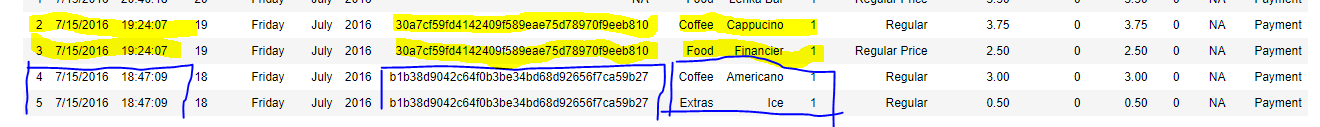

In [4]:
## Now that we've created a unique identifier for every transaction, then we can use this to mine the rules

centralperk_df$transancation_id = paste(centralperk_df$Date, centralperk_df$Time)

In [5]:
## Checking to see the newly formed column

head(centralperk_df, 6)

id,Date,Time,Hour,DayofWeek,Month,Year,Customer.ID,Category,Item,Qty,Price.Point.Name,Gross.Sales,Discounts,Net.Sales,Tax,Notes,Event.Type,transancation_id
1,7/15/2016,20:40:18,20,Friday,July,2016,NA,Food,Lenka Bar,1,Regular Price,3.50,0,3.50,0,NA,Payment,7/15/2016 20:40:18
2,7/15/2016,19:24:07,19,Friday,July,2016,30a7cf59fd4142409f589eae75d78970f9eeb810,Coffee,Cappucino,1,Regular,3.75,0,3.75,0,NA,Payment,7/15/2016 19:24:07
3,7/15/2016,19:24:07,19,Friday,July,2016,30a7cf59fd4142409f589eae75d78970f9eeb810,Food,Financier,1,Regular Price,2.50,0,2.50,0,NA,Payment,7/15/2016 19:24:07
4,7/15/2016,18:47:09,18,Friday,July,2016,b1b38d9042c64f0b3be34bd68d92656f7ca59b27,Coffee,Americano,1,Regular,3.00,0,3.00,0,NA,Payment,7/15/2016 18:47:09
5,7/15/2016,18:47:09,18,Friday,July,2016,b1b38d9042c64f0b3be34bd68d92656f7ca59b27,Extras,Ice,1,Regular,0.50,0,0.50,0,NA,Payment,7/15/2016 18:47:09
6,7/15/2016,18:31:52,18,Friday,July,2016,NA,Coffee,Espresso,1,Regular,3.00,0,3.00,0,NA,Payment,7/15/2016 18:31:52


In [6]:
## Begin our analysis for repeat customer by removing any rows that are missing a Customer ID value
repeat_customers <- centralperk_df %>% filter(Customer.ID != 'NA')

In [7]:
## Check the first five rows to confirm that we're only pulling in customers that have an ID
head(repeat_customers, 5)

id,Date,Time,Hour,DayofWeek,Month,Year,Customer.ID,Category,Item,Qty,Price.Point.Name,Gross.Sales,Discounts,Net.Sales,Tax,Notes,Event.Type,transancation_id
2,7/15/2016,19:24:07,19,Friday,July,2016,30a7cf59fd4142409f589eae75d78970f9eeb810,Coffee,Cappucino,1,Regular,3.75,0,3.75,0,NA,Payment,7/15/2016 19:24:07
3,7/15/2016,19:24:07,19,Friday,July,2016,30a7cf59fd4142409f589eae75d78970f9eeb810,Food,Financier,1,Regular Price,2.50,0,2.50,0,NA,Payment,7/15/2016 19:24:07
4,7/15/2016,18:47:09,18,Friday,July,2016,b1b38d9042c64f0b3be34bd68d92656f7ca59b27,Coffee,Americano,1,Regular,3.00,0,3.00,0,NA,Payment,7/15/2016 18:47:09
5,7/15/2016,18:47:09,18,Friday,July,2016,b1b38d9042c64f0b3be34bd68d92656f7ca59b27,Extras,Ice,1,Regular,0.50,0,0.50,0,NA,Payment,7/15/2016 18:47:09
12,7/15/2016,18:07:32,18,Friday,July,2016,c3176f9559d33798598365a62474b46870e7730f,Coffee,Latte SM,1,SM,4.00,0,4.00,0,NA,Payment,7/15/2016 18:07:32


In [8]:
## Group by customers to get a count of howm many trips they took over the life span of the data
## We arrange them in descending order to see how often they came in

grouped_repeat_customer  <-

        repeat_customers %>%
                group_by(Customer.ID) %>%
                    summarise(trip_count = n()) %>%
                        arrange(-trip_count)

In [118]:
## Here we see the top 10 customers by visit.  We have a few that came in over 300 times over the course of three years
top_ten_customer <- head(grouped_repeat_customer, 100)

top_ten_customer_ids <- top_ten_customer$Customer.ID

In [119]:
## How many discounts did our top 100 customers receive over the three years they visited Coffee Perk?

repeat_customers %>%
        filter(Customer.ID %in% top_ten_customer_ids) %>%
                summarise(total_discount = sum(Discounts))

## A total of less than $16.00 over three years!  That's not good!

total_discount
-15.99


In [11]:
## Create some categories to bucket our customer segments into more manageable groups
bins <- c(1, 2, 3, 4, 5, 6, 11, 26, 51, 101, 700)

## Assign labels for each of the customer segments
binlabels <- c("1","2","3","4","5","6 to 10","11 to 25","26 to 50", "51 to 100", "100+")

## Use this function to add a new column to our data frame later on, when we have grouped our customer segments a bit further
setDT(grouped_repeat_customer)[ , bins := cut(trip_count, 
                                breaks = bins, 
                                right = FALSE, 
                                labels = binlabels)]

In [12]:
## Customer visits grouped by the right labels

customer_visits_binned <- 
        grouped_repeat_customer %>%
                group_by(bins) %>%
                    summarise(customer_visits = n())

In [13]:
customer_visits_binned

bins,customer_visits
1,9052
2,10719
3,4627
4,2402
5,1066
6 to 10,2012
11 to 25,1170
26 to 50,462
51 to 100,198
100+,114


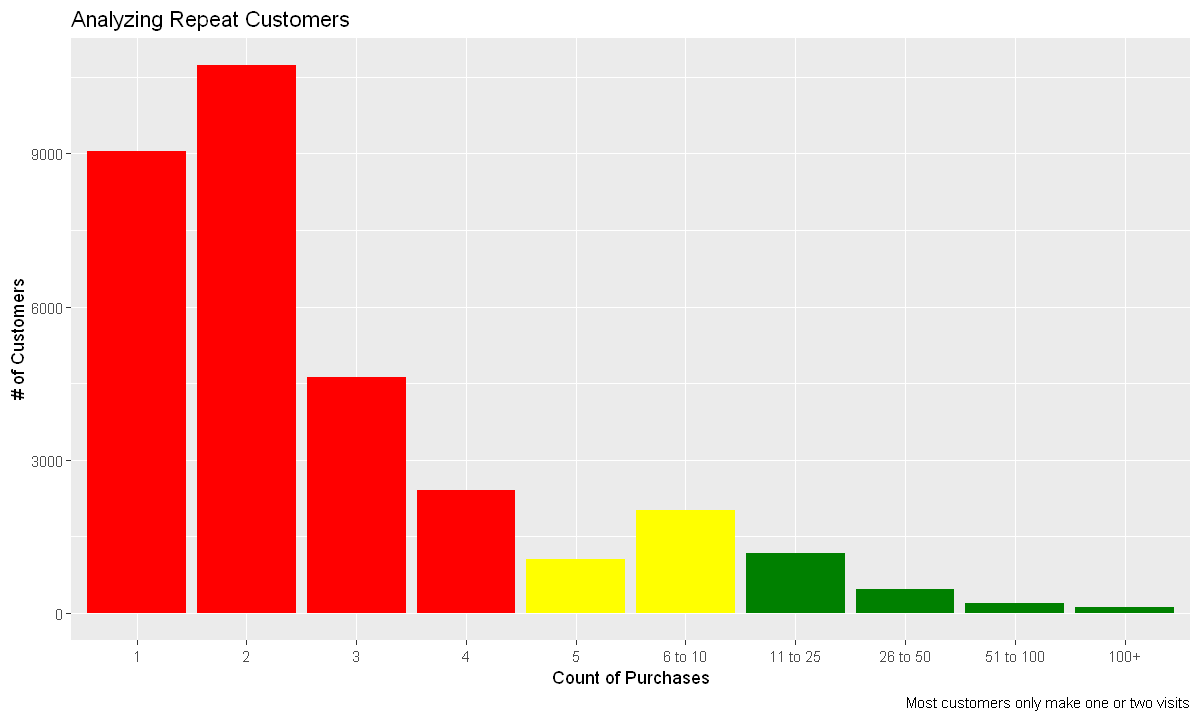

In [29]:
## Build a helpful visual showing that most customers 
ggplot(customer_visits_binned, aes(x = bins, weight = customer_visits, fill = bins)) +
        geom_bar() +
        scale_fill_manual("legend", values = c("1" = "red", "2" = "red", "3" = "red", "4" = "red",
                                              "5" = "yellow", "6 to 10" = "yellow", "11 to 25" = "#008000",
                                              "26 to 50" = "#008000", "51 to 100" = "#008000", "100+" = "#008000")) +
        theme(legend.position = "none") +
        labs(x="Count of Purchases", title = "Analyzing Repeat Customers", y = "# of Customers", caption = "Most customers only make one or two visits")

In [24]:
## Next up, we simply group the count of purchases by day of week - do we see increased traffic on weekends vs. weekdays?

purchases_grouped_by_day <- 
        centralperk_df %>%
                group_by(DayofWeek) %>%
                    summarise(purchases = n())

In [25]:
## Use this to help sort our data labels more accurately
levels <- c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")

## Re-arranging the sort order for our final destionation to help generate a more understandable graphic
purchases_grouped_by_day$DayofWeek <- factor(purchases_grouped_by_day$DayofWeek, levels = levels)

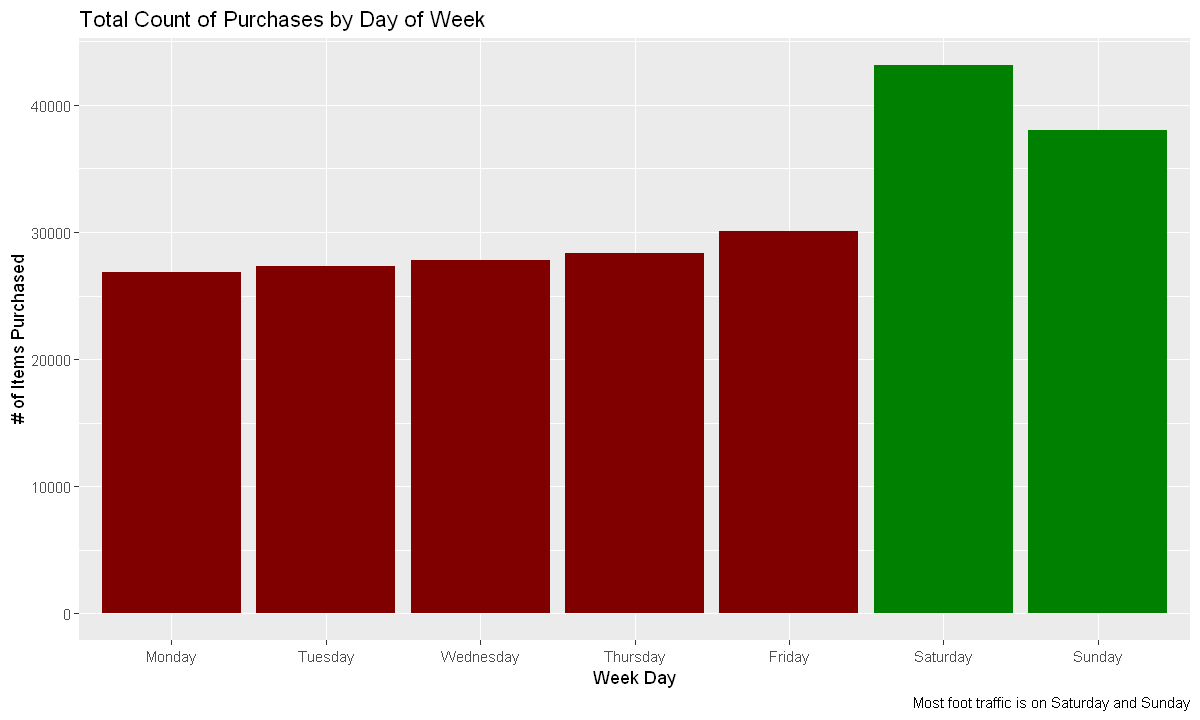

In [55]:
ggplot(purchases_grouped_by_day, aes(x = DayofWeek, weight = purchases, fill = DayofWeek)) +
        geom_bar() +
        scale_fill_manual("legend", values = c("Monday" = "#800000", "Tuesday" = "#800000", "Wednesday" = "#800000", "Thursday" = "#800000",
                                              "Friday" = "#800000", "Saturday" = "#008000", "Sunday" = "#008000")) +
        theme(legend.position = "none") +
        labs(x="Week Day", title = "Total Count of Purchases by Day of Week", y = "# of Items Purchased", caption = "Most foot traffic is on Saturday and Sunday")

In [ ]:
## Excellent!  We see that most traffic is on the weekends.  This was what we suspected, considering the location.  One more thing to check!

In [46]:
## Next up, we simply group the count of purchases by day of week - do we see increased traffic on weekends vs. weekdays?

purchases_grouped_by_time <- 
        centralperk_df %>%
                group_by(Hour) %>%
                    summarise(purchases = n())

In [49]:
## Create a new column to make the time more understandable for our managers
newTime <- c("6:00 AM", "7:00 AM", "8:00 AM", "9:00 AM", "10:00 AM", "11:00 AM", "12:00 PM",
                                   "1:00 PM", "2:00 PM", "3:00 PM", "4:00 PM", "5:00 PM", "6:00 PM", "7:00 PM", "8:00 PM")


purchases_grouped_by_time$Time <- newTime

## Use this to help sort our data labels more accurately
timelevels <- newTime

## Re-arranging the sort order for our final destionation to help generate a more understandable graphic
purchases_grouped_by_time$Time <- factor(purchases_grouped_by_time$Time, levels = timelevels)

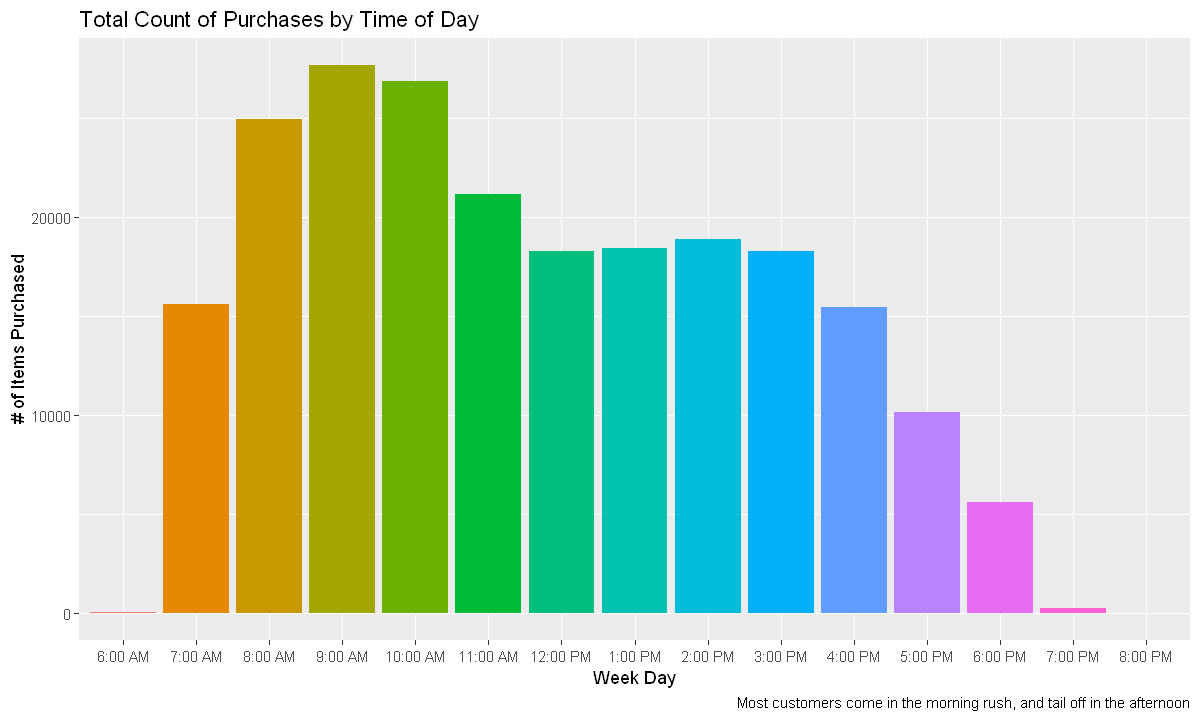

In [56]:
## Generate a nice plot to display this information

ggplot(purchases_grouped_by_time, aes(x = Time, weight = purchases, fill = Time)) +
        geom_bar() +
        theme(legend.position = "none") +
        labs(x="Week Day", title = "Total Count of Purchases by Time of Day", y = "# of Items Purchased", caption = "Most customers come in the morning rush, and tail off in the afternoon")

In [98]:
## Finally, we're going to look at the total net sales by year and monthly.  We want to see if there are any fluctuations or strange behavior here.

net_sales_by_month_year <-
        centralperk_df %>%
                group_by(Year, Month) %>%
                        summarise(NetSales = sum(Net.Sales))

In [99]:
year_levels = c("2016", "2017", "2018")
month_levels = c("January", "February", "March", "April", "May", "June", "July", "August", "September",
                    "October","November", "December")



net_sales_by_month_year$Year <- factor(net_sales_by_month_year$Year, levels = year_levels)
net_sales_by_month_year$Month <- factor(net_sales_by_month_year$Month, levels = month_levels)

In [102]:
net_sales_by_month_year$MonthAbv <- substr(net_sales_by_month_year$Month, 0, 3)

abv_levels = c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")
net_sales_by_month_year$MonthAbv <- factor(net_sales_by_month_year$MonthAbv, levels = abv_levels)

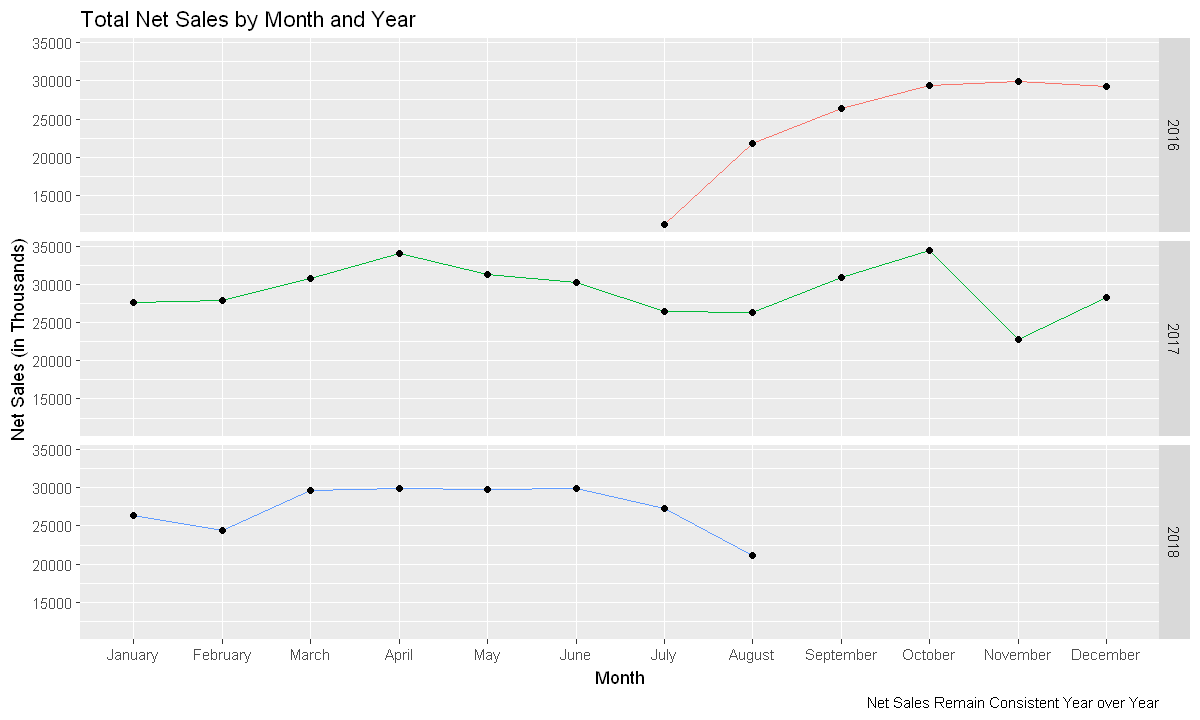

In [96]:
## Create the first plot, to see month over month how Net Sales changes

ggplot(net_sales_by_month_year, aes(x = Month, y = NetSales, group = Year)) +
        geom_line(aes(col = Year)) +
        geom_point() + 
        facet_grid(Year ~ .) +
        theme(legend.position = "none") + 
        labs(title = "Total Net Sales by Month and Year", y = "Net Sales (in Thousands)", caption = "Net Sales Year over Year")

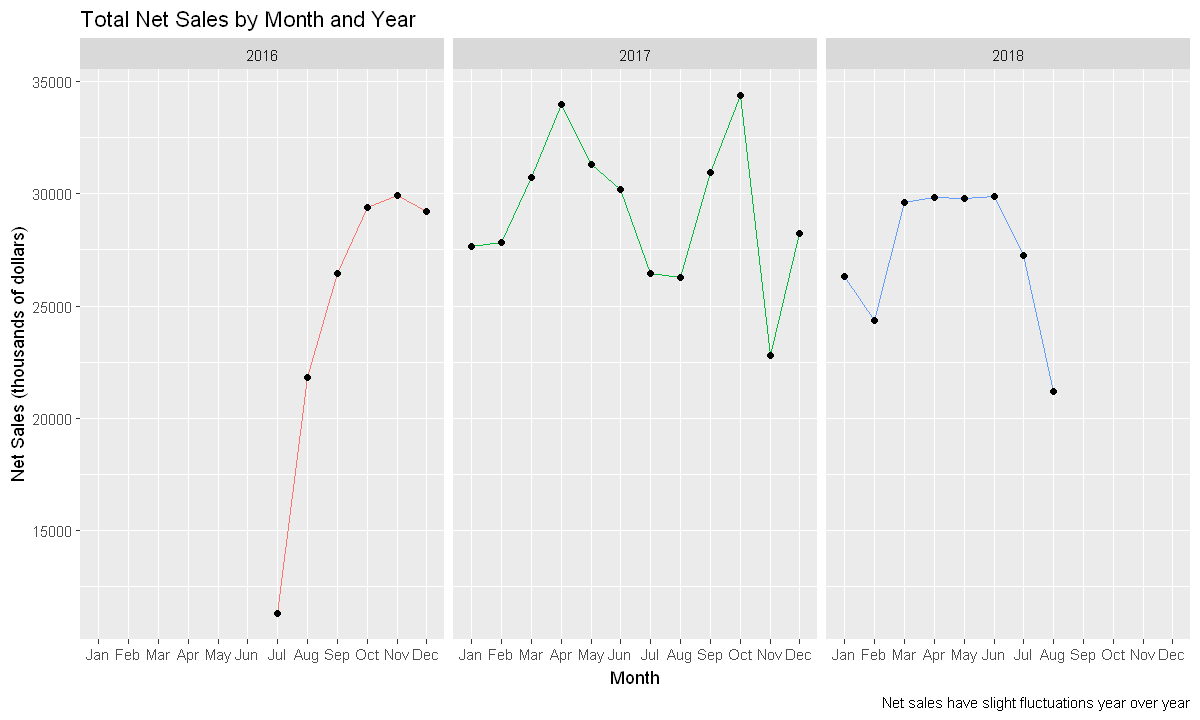

In [121]:
## Generate a plot with Sales by Month and Year with a different view, to see the change over the course of the data

ggplot(net_sales_by_month_year, aes(x = MonthAbv, y = NetSales, group = Year)) +
        geom_line(aes(col = Year)) +
        geom_point() + 
        facet_grid(. ~ Year) +
        theme(legend.position = "none") + 
        labs(x = "Month", title = "Total Net Sales by Month and Year", 
             y = "Net Sales (thousands of dollars)", caption = "Net sales have slight fluctuations year over year")

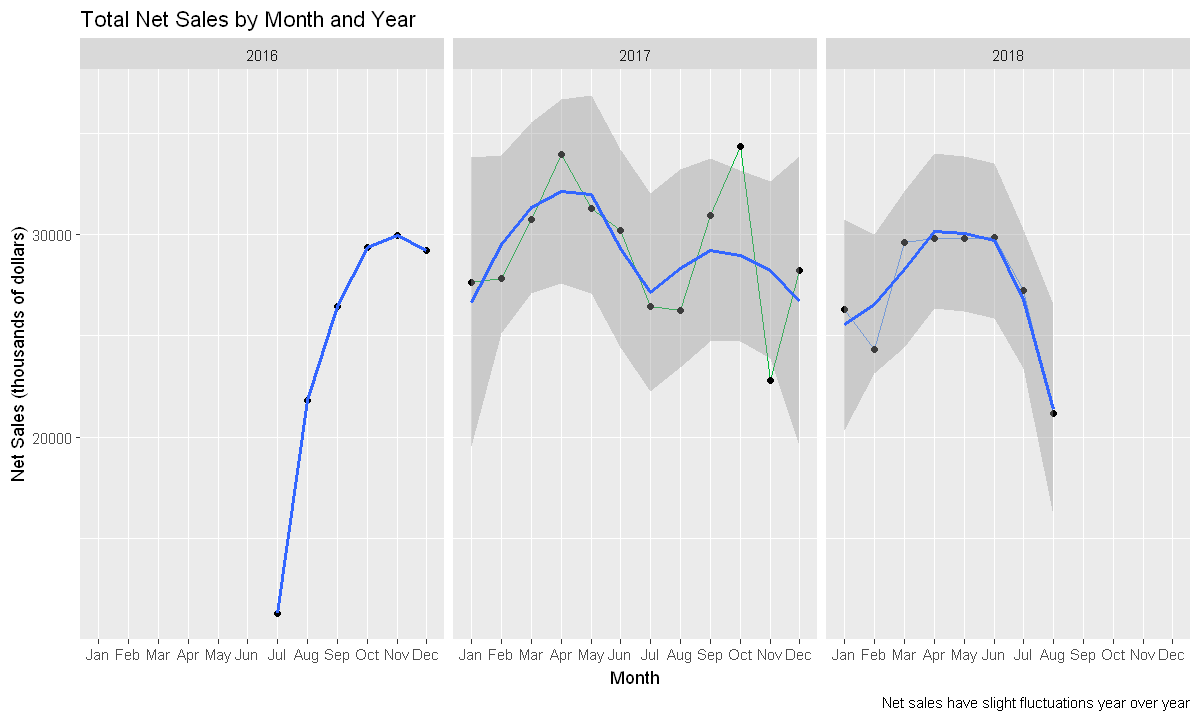

In [124]:
## Generate a plot with Sales by Month and Year with a different view, to see the change over the course of the data

ggplot(net_sales_by_month_year, aes(x = MonthAbv, y = NetSales, group = Year)) +
        geom_line(aes(col = Year)) +
        geom_point() + 
        facet_grid(. ~ Year) +
        theme(legend.position = "none") + 
        labs(x = "Month", title = "Total Net Sales by Month and Year", 
             y = "Net Sales (thousands of dollars)", caption = "Net sales have slight fluctuations year over year") +
        geom_smooth(method = "loess")

In [125]:
! ls

ERROR: Error in !ls: invalid argument type
